<a href="https://colab.research.google.com/github/emanuel379/Regressao---II/blob/main/Exerc%C3%ADcio_3_Lista_3_SME0823_Modelos_de_Regress%C3%A3o_e_Aprendizado_Supervisionado_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggplot2")
install.packages("pscl")
install.packages("boot")
install.packages("MASS")
install.packages("GGally")
install.packages("lmtest")
install.packages("gridExtra")

require(ggplot2)
require(pscl)
require(boot)
require(MASS)
require(GGally)
require(lmtest)
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: pscl

Classes and Methods for R originally developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University (2002-2015),
by and under the direction of Simon Jackman.
hurdle and zeroinfl functions by Achim Z

**Exercício 3:** Um grupo de biólogos estaduais da vida selvagem querem modelar quantos peixes estão sendo capturados pelos pescadores em um parque estadual. Temos dados sobre 250 grupos que foram a um parque. Cada grupo foi questionado sobre quantos peixes eles capturaram (contagem -count), quantas crianças estavam no grupo (criança -child ), quantas pessoas estavam no grupo (pessoas - persons) e se trouxeram um campista para o parque (campista -camper). Os dados estão disponíveis em https://stats.idre.ucla.edu/stat/data/fish.csv e há outros variáveis não consideradas na análise. Alguns visitantes que pescaram não pegaram nenhum peixe, portanto, há zeros em excesso nos dados devido às pessoas que não pescaram. Desenvolva uma análise deste conjunto de dados propondo
os modelos regressão de contagem: Poisson, Binomial Negativo, Poisson inflado de zeros e Binomial Negativo inflacionado de zeros usando ligação log. Qual é o melhor modelo para esses dados. Detalhe dos dados (exemplo 2), modelo, inferência e análise estão disponíveis em https://
stats.idre.ucla.edu/r/dae/zip/ e https://stats.idre.ucla.edu/r/dae/zinb/ e você pode usar eles como referência para criar seu relatório.

In [ ]:
df <- read.csv("https://stats.idre.ucla.edu/stat/data/fish.csv")
df <- within(df, {
    nofish <- factor(nofish)
    livebait <- factor(livebait)
    camper <- factor(camper)
})

df

nofish,livebait,camper,persons,child,xb,zg,count
<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>
1,0,0,1,0,-0.89631456,3.050404787,0
0,1,1,1,0,-0.55834496,1.746148944,0
0,1,0,1,0,-0.40173101,0.279938877,0
0,1,1,2,1,-0.95629811,-0.601525664,0
0,1,0,1,0,0.43689096,0.527709126,1
0,1,1,4,2,1.39448547,-0.707534790,0
0,1,0,3,1,0.18471675,-3.398022175,0
0,1,0,4,3,2.32910657,-5.450901508,0
1,0,1,3,2,0.18838648,-1.527417779,0


In [ ]:
# Fazendo alguns reajustes nos dados

# Carregando a biblioteca statats
library(stats)

# Convertendo variáveis para numéricas
df$count <- as.numeric(as.character(df$count))

# Removendo colunas com dados Nan e inf
df <- df[complete.cases(df), ]

In [ ]:
summary(df)

 nofish  livebait camper     persons          child             xb           
 0:176   0: 34    0:103   Min.   :1.000   Min.   :0.000   Min.   :-3.275050  
 1: 74   1:216    1:147   1st Qu.:2.000   1st Qu.:0.000   1st Qu.: 0.008267  
                          Median :2.000   Median :0.000   Median : 0.954550  
                          Mean   :2.528   Mean   :0.684   Mean   : 0.973796  
                          3rd Qu.:4.000   3rd Qu.:1.000   3rd Qu.: 1.963855  
                          Max.   :4.000   Max.   :3.000   Max.   : 5.352674  
       zg              count        
 Min.   :-5.6259   Min.   :  0.000  
 1st Qu.:-1.2527   1st Qu.:  0.000  
 Median : 0.6051   Median :  0.000  
 Mean   : 0.2523   Mean   :  3.296  
 3rd Qu.: 1.9932   3rd Qu.:  2.000  
 Max.   : 4.2632   Max.   :149.000  

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 142 rows containing non-finite outside the scale range (`stat_bin()`).”


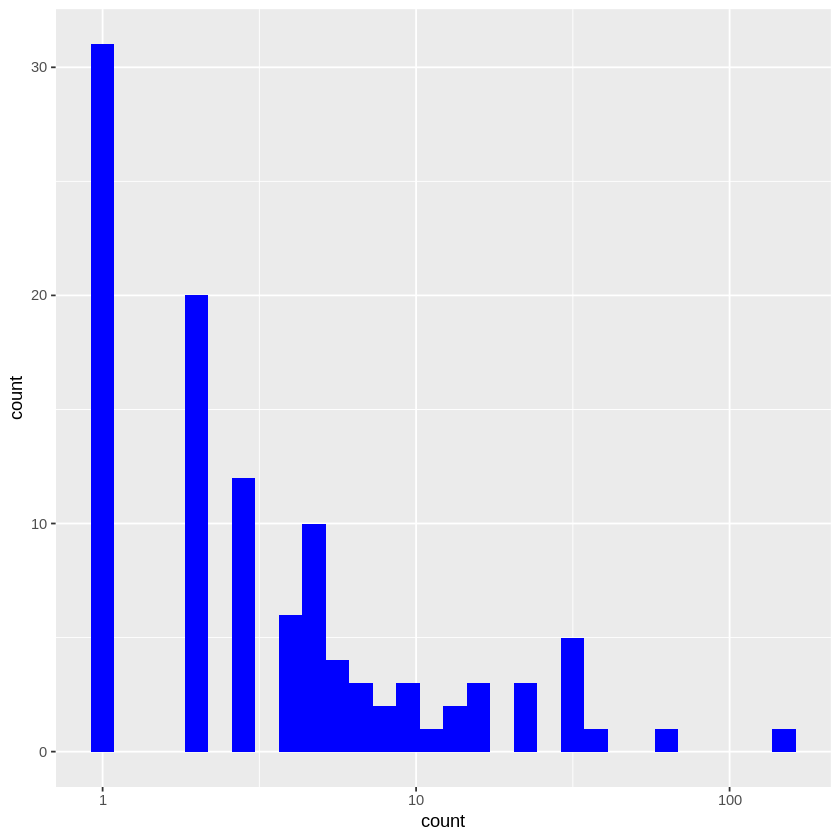

In [ ]:
# Observando as frequências com que os peixes foram capturados na escala log10

ggplot(df, aes(count)) +
  geom_histogram(fill = "blue") +
  scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


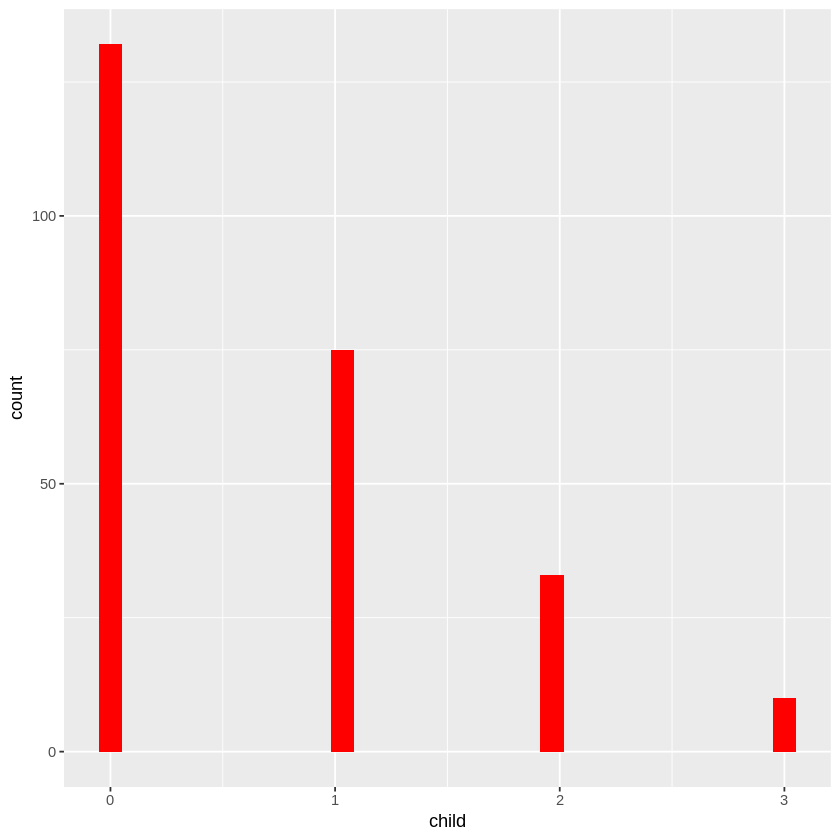

In [ ]:
# Observando as frequências para a quantidade de crianças por grupo

ggplot(df, aes(child)) +
  geom_histogram(fill = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


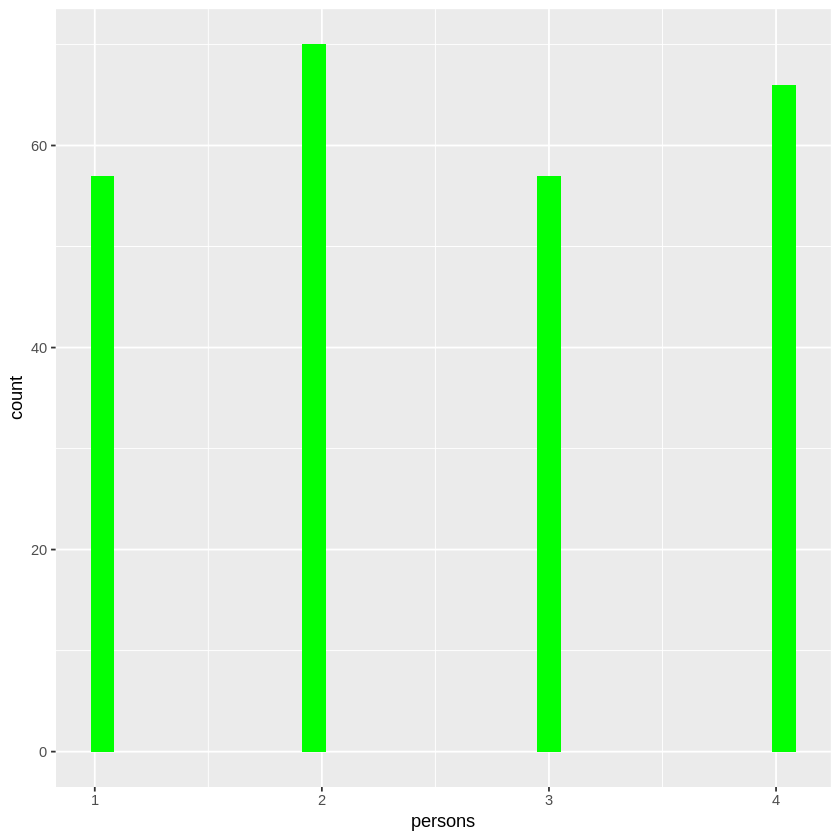

In [ ]:
# Observando as frequências para a quantidade de pessoas por grupo

ggplot(df, aes(persons)) +
  geom_histogram(fill = "green")

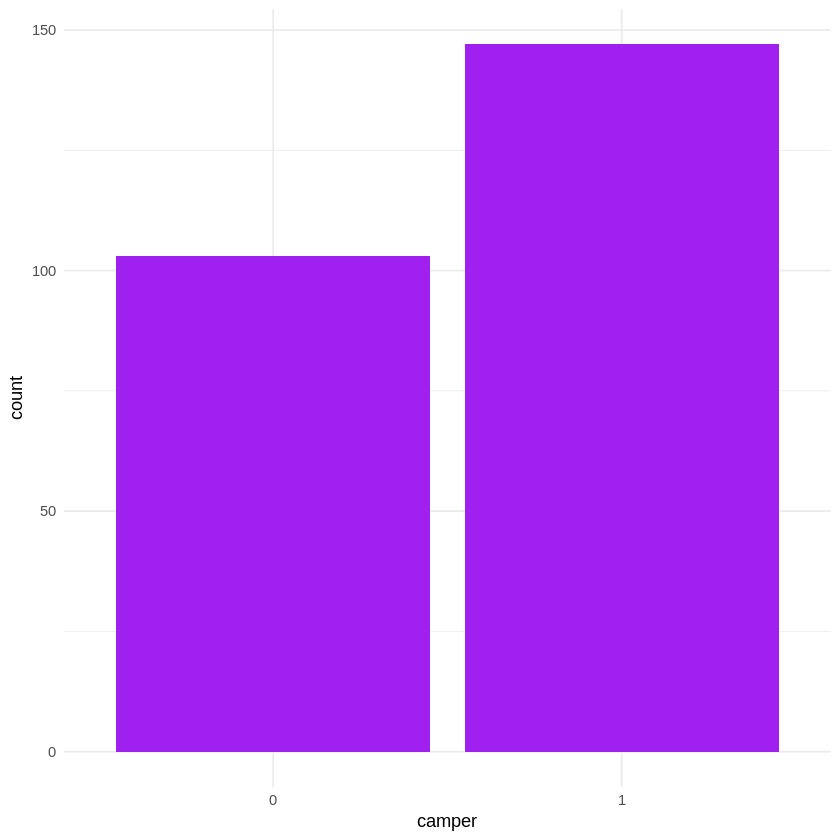

In [ ]:
# Gráfico de barras para a variável categórica 'camper'

ggplot(df, aes(x = camper)) +
  geom_bar(fill = "purple") +
  theme_minimal()

Como é possível observar, existe um excesso de zeros na variável resposta, já para as preditoras esse excesso se encontra na variável child.

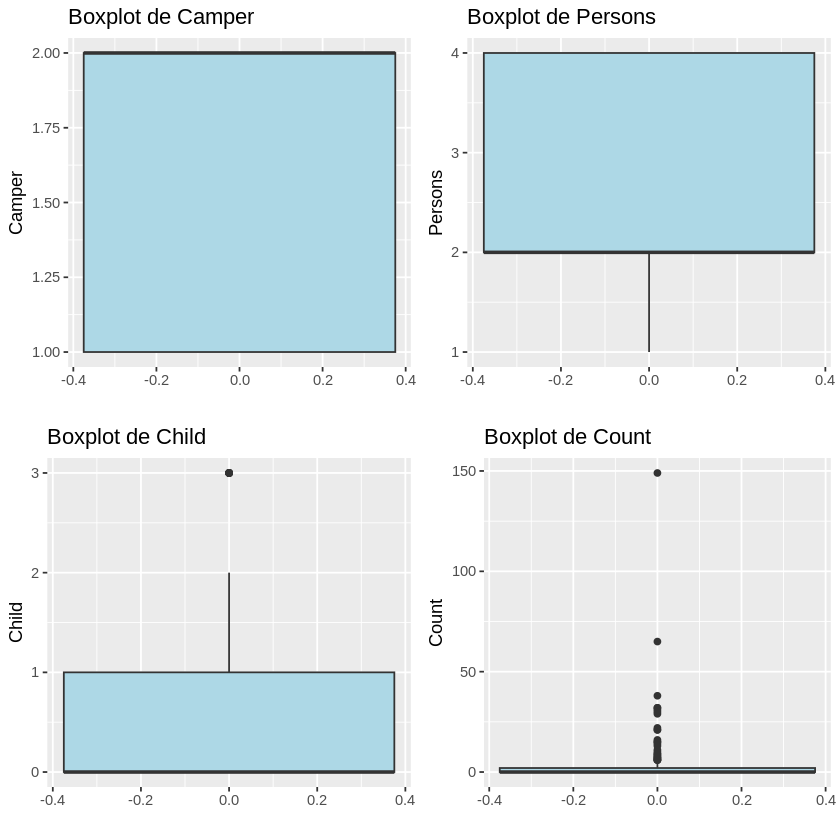

In [ ]:
# Boxplot para a variável 'camper'
p1 <- ggplot(df, aes(y = as.numeric(camper))) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Camper", y = "Camper", x = "")

# Boxplot para a variável 'persons'
p2 <- ggplot(df, aes(y = persons)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Persons", y = "Persons", x = "")

# Boxplot para a variável 'child'
p3 <- ggplot(df, aes(y = child)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Child", y = "Child", x = "")

# Boxplot para a variável 'count'
p4 <- ggplot(df, aes(y = count)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot de Count", y = "Count", x = "")

# Organizar os gráficos em uma única visualização
grid.arrange(p1, p2, p3, p4, ncol = 2)

Como é possível observar, a análise de boxplot para a variável count é bastante imprecisa devido ao excesso de outliars e outsiders, que precisarão ser removidos para o melhor ajuste do modelo.

In [ ]:
# Removendo outliars da variável count
# Calculando o primeiro e o terceiro quartil de 'count'
Q1 <- quantile(df$count, 0.25)
Q3 <- quantile(df$count, 0.75)

# Calculando o intervalo interquartil (IQR)
IQR_value <- Q3 - Q1

# Definindo limites para não considerar outliers
lower_bound <- Q1 - 1.5 * IQR_value
upper_bound <- Q3 + 1.5 * IQR_value

# Filtrando apenas os valores de 'count' que não são outliers
df <- df[df$count >= lower_bound & df$count <= upper_bound, ]

# Verificando os primeiros valores do novo dataframe
head(df)

,nofish,livebait,camper,persons,child,xb,zg,count,fitted
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,-0.8963146,3.0504048,0,0.4104240
2,0,1,1,1,0,-0.5583450,1.7461489,0,1.0411975
3,0,1,0,1,0,-0.4017310,0.2799389,0,0.4104240
4,0,1,1,2,1,-0.9562981,-0.6015257,0,0.5721677
5,0,1,0,1,0,0.4368910,0.5277091,1,0.4104240
6,0,1,1,4,2,1.3944855,-0.7075348,0,0.9363596


Vamos agora modelar esses dados com base nas informações obtidas.

# Modelo Poisson

In [ ]:
# Regressão de Poisson
poisson <- glm(count ~ child + camper + persons, data = df, family = poisson())

# Sumário do modelo
summary(poisson)


Call:
glm(formula = count ~ child + camper + persons, family = poisson(), 
    data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5788     0.3499  -4.512 6.42e-06 ***
child        -1.3224     0.2346  -5.636 1.74e-08 ***
camper1       0.2785     0.2449   1.137 0.255405    
persons       0.4913     0.1319   3.725 0.000195 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 197.45  on 192  degrees of freedom
Residual deviance: 158.34  on 189  degrees of freedom
AIC: 280.61

Number of Fisher Scoring iterations: 6


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.0401”


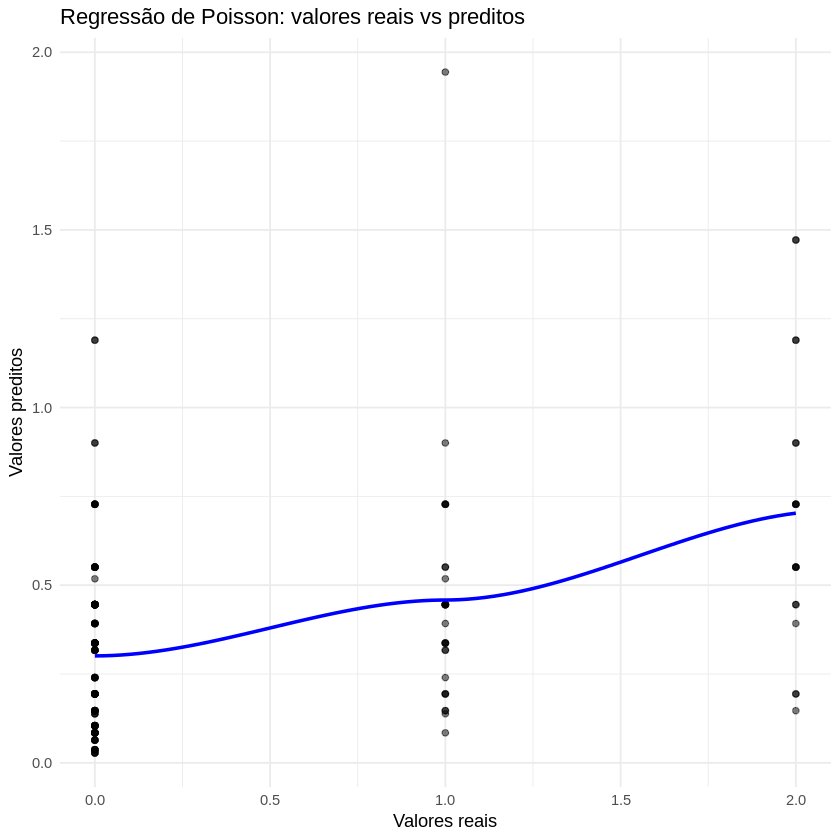

In [ ]:
# Calculando os valores preditos
df$fitted <- predict(poisson, type = "response")

# Criando um scatter plot dos valores reais vs preditos
ggplot(df, aes(x = count, y = fitted)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "blue", se = FALSE) +
  labs(title = "Regressão de Poisson: valores reais vs preditos",
       x = "Valores reais",
       y = "Valores preditos") +
  theme_minimal()

# Modelo Poisson inflado de zeros

In [ ]:
# Ajustando uma regressão de poisson com inflação de zeros
zero_inflated_poisson <- zeroinfl(count ~ child + camper + persons| persons , data = df)

# Sumário do modelo
summary(zero_inflated_poisson)


Call:
zeroinfl(formula = count ~ child + camper + persons | persons, data = df)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.0926 -0.5493 -0.4167  0.1704  4.3517 

Count model coefficients (poisson with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0273     0.6475  -1.586    0.113    
child        -1.3167     0.2361  -5.576 2.46e-08 ***
camper1       0.2547     0.2529   1.007    0.314    
persons       0.3180     0.1954   1.628    0.104    

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)    2.514      8.738   0.288    0.774
persons       -2.907      9.187  -0.316    0.752
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 27 
Log-likelihood:  -135 on 6 Df

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.0401”


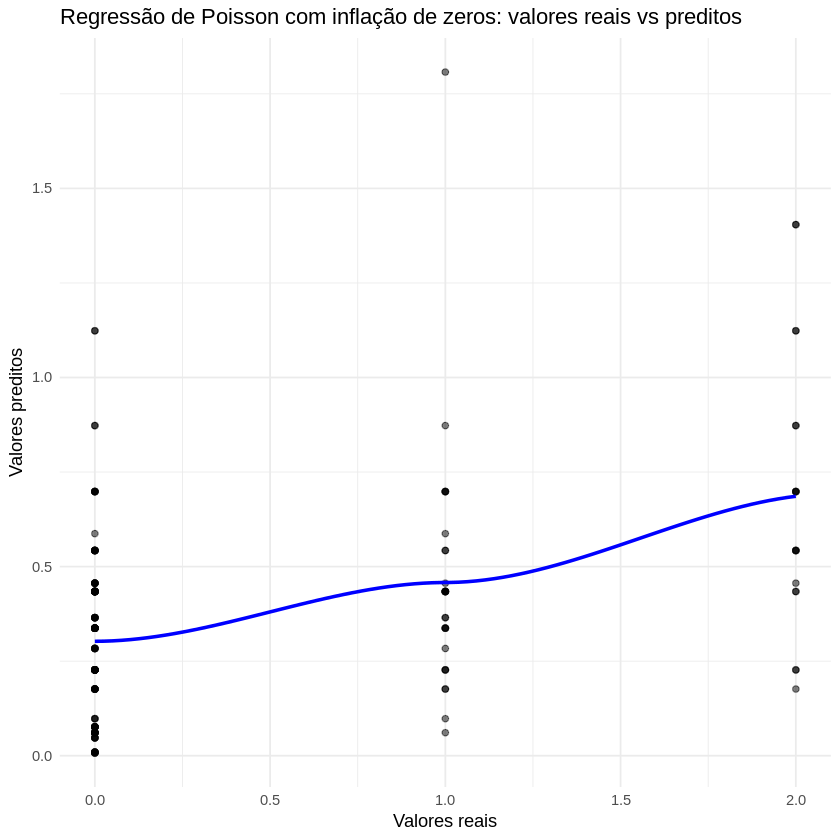

In [ ]:
# Calculando os valores preditos e as probabilidades zero-infladas
df$fitted <- predict(zero_inflated_poisson, type = "response")
df$zero_prob <- predict(zero_inflated_poisson, type = "zero")

# Criando um scatter plot dos valores reais vs preditos
ggplot(df, aes(x = count, y = fitted)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "blue", se = FALSE) +
  labs(title = "Regressão de Poisson com inflação de zeros: valores reais vs preditos",
       x = "Valores reais",
       y = "Valores preditos") +
  theme_minimal()

# Modelo Binomial Negativo

In [ ]:
# Regressão Binomial Negativa
nb_model <- glm.nb(count ~ child + persons + camper, data = df)

# Sumário do modelo
summary(nb_model)

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”



Call:
glm.nb(formula = count ~ child + persons + camper, data = df, 
    init.theta = 2218.306401, link = log)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5789     0.3500  -4.512 6.44e-06 ***
child        -1.3224     0.2347  -5.635 1.75e-08 ***
persons       0.4913     0.1319   3.724 0.000196 ***
camper1       0.2786     0.2449   1.137 0.255379    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(2218.306) family taken to be 1)

    Null deviance: 197.41  on 192  degrees of freedom
Residual deviance: 158.31  on 189  degrees of freedom
AIC: 282.61

Number of Fisher Scoring iterations: 1


              Theta:  2218 
          Std. Err.:  39825 
Warning while fitting theta: iteration limit reached 

 2 x log-likelihood:  -272.612 

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.0401”


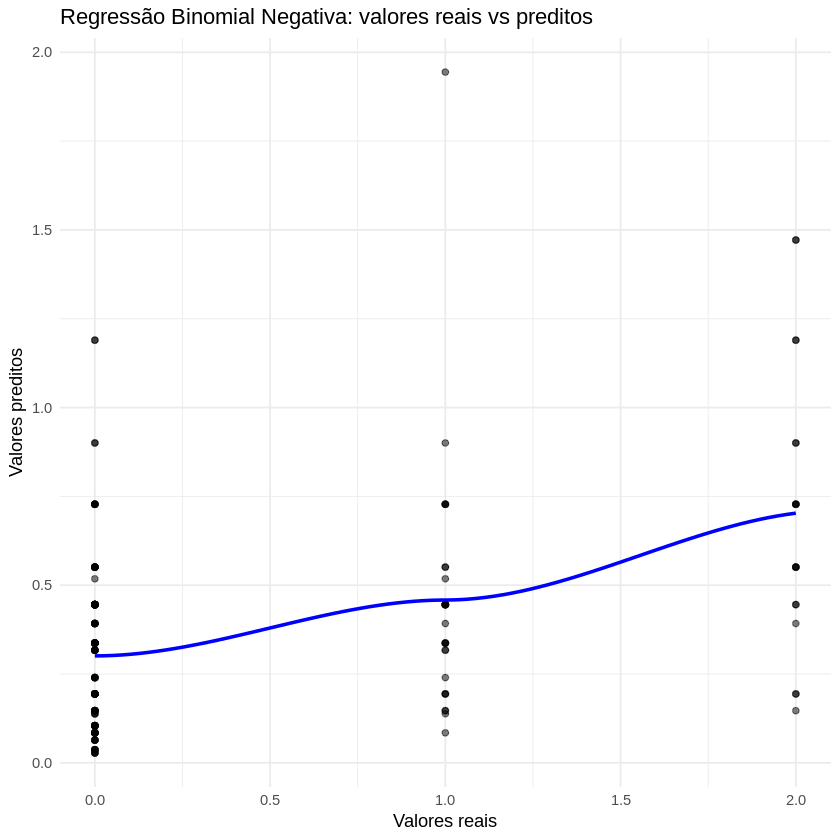

In [ ]:
# Calculando os valores preditos
df$fitted_nb <- predict(nb_model, type = "response")

# Criando um scatter plot dos valores reais vs preditos
ggplot(df, aes(x = count, y = fitted_nb)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "blue", se = FALSE) +
  labs(title = "Regressão Binomial Negativa: valores reais vs preditos",
       x = "Valores reais",
       y = "Valores preditos") +
  theme_minimal()

# Modelo binomial negativo inflado de zeros

In [ ]:
# Ajustando uma regressão binomial negativa com inflação de zeros
zero_inflated_nb <- zeroinfl(count ~ child + camper + persons| persons,
                             data = df, dist = "negbin",
                             link = "log")


# Sumário do modelo
summary(zero_inflated_nb)


Call:
zeroinfl(formula = count ~ child + camper + persons | persons, data = df, 
    dist = "negbin", link = "log")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.0891 -0.5485 -0.4130  0.1797  4.3669 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9827     0.6208  -1.583   0.1134    
child        -1.3179     0.2368  -5.566  2.6e-08 ***
camper1       0.2527     0.2541   0.994   0.3200    
persons       0.3092     0.1842   1.678   0.0933 .  
Log(theta)    8.5800    36.3826   0.236   0.8136    

Zero-inflation model coefficients (binomial with log link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.8956     4.2780   0.209    0.834
persons      -1.7715     4.4954  -0.394    0.694
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 5324.1385 
Number of iterations in BFGS optimization: 32 
Log-likelihood:  -135 on 7 Df

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.0401”


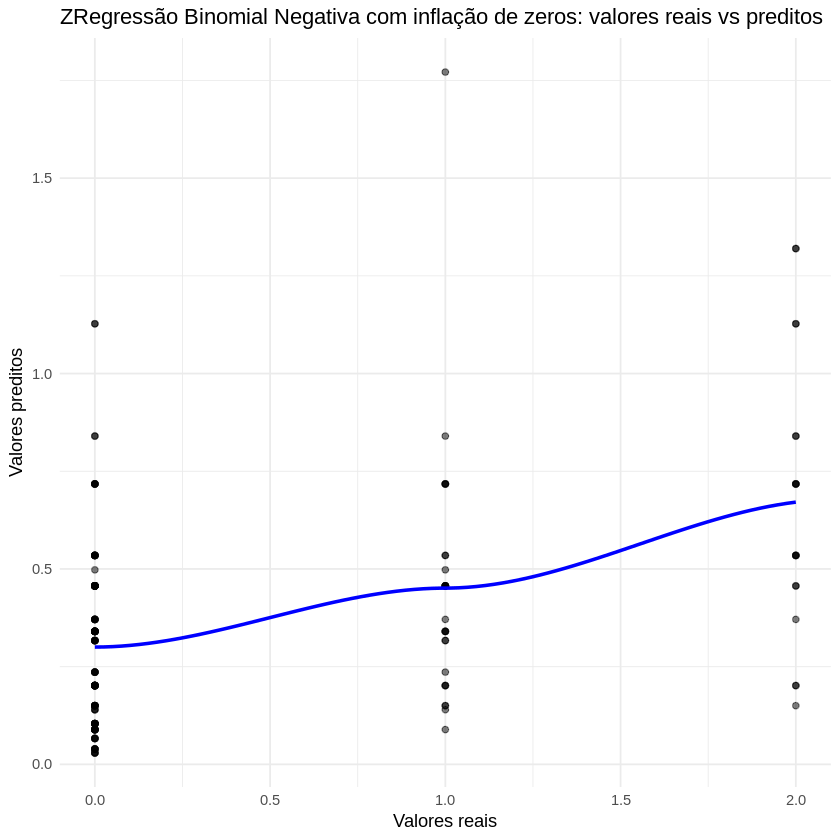

In [ ]:
# Calculando os valores preditos e as probabilidades zero-infladas
df$fitted_zinb <- predict(zero_inflated_nb, type = "response")
df$zero_prob <- predict(zero_inflated_nb, type = "zero")

# Criando um scatter plot dos valores reais vs preditos
ggplot(df, aes(x = count, y = fitted_zinb)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "blue", se = FALSE) +
  labs(title = "ZRegressão Binomial Negativa com inflação de zeros: valores reais vs preditos",
       x = "Valores reais",
       y = "Valores preditos") +
  theme_minimal()

Para todos os modelos as varáveis child, persons e camper foram significativas, vamos agora avaliar a qualidade dos ajustes e quais os melhores modelos, uma vez que a análise gráfica não se faz tão intuitiva.

# Análise dos ajustes

Comparando com base no AIC

In [ ]:
AIC(poisson)
AIC(zero_inflated_poisson)
AIC(nb_model)
AIC(zero_inflated_nb)

[1] 280.6108

[1] 282.0558

[1] 282.6117

[1] 284.0384

De acordo com o AIC, temos que o modelo poisson é o que melhor se adequa aos dados, sendo que a inflação de zeros não se mostrou mais eficiente em nenhum dos modelos propostos.

Analisando a adequabilidade dos modelos com base no teste da razão de verossimilhança

In [ ]:
# Análise de desvio Poisson vs Binomial Negativa
anova(poisson, nb_model, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,189,158.3367,NA,NA,NA
2,189,158.3056,0,0.03108193,NA


In [ ]:
# Teste da Razão de Verossimilhança  Poisson vs Binomial Negativa
lrtest(poisson, nb_model)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,-136.3054,NA,NA,NA
2,5,-136.3059,1,0.0009155993,0.9758606


A queda inexpressiva no desvio residual, bem como o valor bastante semelhante da função log-verossimilhança, nos mostra que o modelo binomial não se mostrou mais eficiente que o modelo poisson, o valor-p elevado corrobora essa afirmação.

In [ ]:
# Teste da Razão de Verossimilhança  Poisson vs Poisson inflada de zeros
lrtest(poisson, zero_inflated_poisson)

Warning message in modelUpdate(objects[[i - 1]], objects[[i]]):
“original model was of class "glm", updated model is of class "zeroinfl"”


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,-136.3054,NA,NA,NA
2,6,-135.0279,2,2.555052,0.278726


O valor-p nos indica que o modelo poisson inflado de zeros não se mostrou mais eficiente que o não inflado para o ajuste aos dados, ao analizarmos a função log-verossimilhança também é possível notar que o modelo inflado de zeros não apresenta uma significativa melhora em relação ao não inflado.

In [ ]:
# Teste da Razão de Verossimilhança  Poisson inflada de zeros vs Binomial Negativa inflada de zeros
lrtest(zero_inflated_poisson, zero_inflated_nb)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-135.0279,NA,NA,NA
2,7,-135.0192,1,0.01735072,0.8952041


A diferença inexpressiva do valor da função log-verossimilhança, bem como o valor-p nos indicam que o modelo binomial negativo com inflação de zeros não apresenta um melhor ajuste aos dados que o modelo poisson com tal inflação.

In [ ]:
# Teste da Razão de Verossimilhança  Binomial Negativa vs Binomial Negativa inflada de zeros
lrtest(nb_model, zero_inflated_nb)

Warning message in modelUpdate(objects[[i - 1]], objects[[i]]):
“original model was of class "negbin", updated model is of class "zeroinfl"”


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-136.3059,NA,NA,NA
2,7,-135.0192,2,2.573318,0.2761919


A estatística de teste nos revela que o modelo binomial negativo apresenta um ajuste suficientemente bom aos dados, sem a necessidade do respectivo modelo inflacionado, apesar de um valor maior da função log-verossimilhança para o caso onde há inflação, tranzendo evidências de que tal melhoria não é significativa, podendo ser proveniente do acaso e não da melhor adequabilidade do modelo inflacionado aos dados.

**Conclusão:** em suma, observamos, com base nos critérios AIC e razão de verossimilhanças, que o modelo poisson foi o que apresentou o melhor ajuste aos dados, considerar a inflação de zeros em ambos os casos não nos trouxe evidências de que houveram melhorias significativas no ajuste, sendo assim, os modelo mais simples são suficientemente bons para explicar a variabilidade dos dados.